* https://medium.datadriveninvestor.com/using-logarithmic-regression-to-predict-the-future-prices-of-bitcoin-and-ethereum-52f05e7b92b8

In [1]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
superscript_map = {"ic": "ᶦᶜ", "fic": "ᶠᶦᶜ",
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴", "5": "⁵", "6": "⁶",
    "7": "⁷", "8": "⁸", "9": "⁹", "a": "ᵃ", "b": "ᵇ", "c": "ᶜ", "d": "ᵈ",
    "e": "ᵉ", "f": "ᶠ", "g": "ᵍ", "h": "ʰ", "i": "ᶦ", "j": "ʲ", "k": "ᵏ",
    "l": "ˡ", "m": "ᵐ", "n": "ⁿ", "o": "ᵒ", "p": "ᵖ", "q": "۹", "r": "ʳ",
    "s": "ˢ", "t": "ᵗ", "u": "ᵘ", "v": "ᵛ", "w": "ʷ", "x": "ˣ", "y": "ʸ",
    "z": "ᶻ", "A": "ᴬ", "B": "ᴮ", "C": "ᶜ", "D": "ᴰ", "E": "ᴱ", "F": "ᶠ",
    "G": "ᴳ", "H": "ᴴ", "I": "ᴵ", "J": "ᴶ", "K": "ᴷ", "L": "ᴸ", "M": "ᴹ",
    "N": "ᴺ", "O": "ᴼ", "P": "ᴾ", "Q": "Q", "R": "ᴿ", "S": "ˢ", "T": "ᵀ",
    "U": "ᵁ", "V": "ⱽ", "W": "ᵂ", "X": "ˣ", "Y": "ʸ", "Z": "ᶻ", "+": "⁺",
    "-": "⁻", "=": "⁼", "(": "⁽", ")": "⁾"}

In [3]:
def formatDates(arr,date_format="%Y-%m-%d %H:%M"):
    return [datetime.datetime.strptime(d, date_format) for d in arr]

def stripCharacter(arr,c,r=''):
    return [e.replace(c, r) for e in arr]

def str2Float(arr):
    return [float(e) for e in arr]

def getDate(t, strt_date):
    return datetime.datetime.strptime(strt_date, "%Y-%m-%d") + datetime.timedelta(days=t) 

def x2Percent(x):
    return 100*(x - 1)

def percent2X(percent):
    return 1 + percent/100

In [4]:
eth_price = pd.read_csv('../resources/eth_daily.csv')
eth_price = eth_price.assign(time = stripCharacter(eth_price['time'].values,'/','-'))
eth_price = eth_price.assign(time = formatDates(eth_price['time'].values,date_format="%m-%d-%Y"))
for colnm in eth_price.columns[1:]:
    arr = np.array(stripCharacter(eth_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'B'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    eth_price[colnm] = arr
eth_price = eth_price.sort_values(by='time')
eth_price.reset_index(drop=True, inplace=True)

In [5]:
btc_price = pd.read_csv('../resources/btc_daily.csv')
btc_price = btc_price.assign(time = stripCharacter(btc_price['time'].values,'/','-'))
btc_price = btc_price.assign(time = formatDates(btc_price['time'].values,date_format="%m-%d-%Y"))
for colnm in btc_price.columns[1:]:
    arr = np.array(stripCharacter(btc_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'B'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    btc_price[colnm] = arr
btc_price = btc_price.sort_values(by='time')
btc_price.reset_index(drop=True, inplace=True)

In [6]:
BTC_HALVENING_2016 = datetime.datetime(2016, 7, 9)
BTC_HALVENING_2020 = datetime.datetime(2020, 5, 11)

ETH_MC_2016 = 5870000
BTC_MC_2016 = 114140000
COMB_MC_2016 = ETH_MC_2016 + BTC_MC_2016
COMB_SQRTMC_2016 = ETH_MC_2016**0.5 + BTC_MC_2016**0.5
ETH_MC_2020 = 15440000000
BTC_MC_2020 = 119760000000
COMB_MC_2020 = ETH_MC_2020 + BTC_MC_2020
COMB_SQRTMC_2020 = ETH_MC_2020**0.5 + BTC_MC_2020**0.5

#eth_price = eth_price.loc[eth_price['time'] >= BTC_HALVENING_2016]
#btc_price = btc_price.loc[btc_price['time'] >= BTC_HALVENING_2016]
eth_price = eth_price.loc[eth_price['time'] >= BTC_HALVENING_2020]
btc_price = btc_price.loc[btc_price['time'] >= BTC_HALVENING_2020]

bot = np.zeros(len(eth_price))
dates = eth_price['time'].values
eth_close = eth_price['close'].values
btc_close = btc_price['close'].values

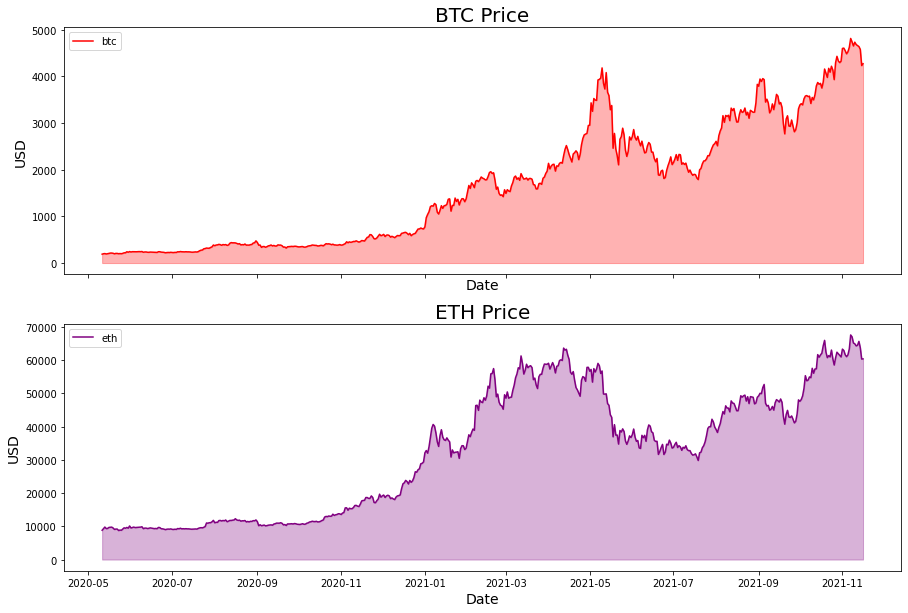

In [7]:
fig, (eth_ax, btc_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(15, 10))

btc_ax.plot(dates, btc_close, label='eth',color='purple')      
btc_ax.fill_between(dates, bot, btc_close, alpha=0.3, color='purple')
btc_ax.set_xlabel('Date', fontsize=14)
btc_ax.set_ylabel('USD', fontsize=14)
btc_ax.set_title('ETH Price', fontsize=20)
btc_ax.legend()

eth_ax.plot(dates, eth_close, label='btc',color='red')      
eth_ax.fill_between(dates, bot, eth_close, alpha=0.3, color='red')
eth_ax.set_xlabel('Date', fontsize=14)
eth_ax.set_ylabel('USD', fontsize=14)
eth_ax.set_title('BTC Price', fontsize=20)
eth_ax.legend()

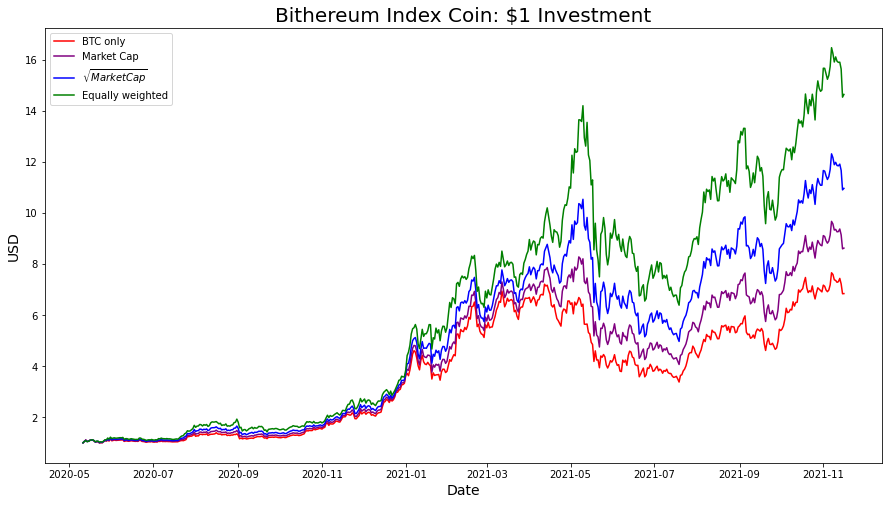

In [8]:
INVESTMENT = 1

NBTC = INVESTMENT/btc_price['close'].values[0]
NETH = INVESTMENT/eth_price['close'].values[0]
btc_investment = NBTC*btc_price['close'].values
eth_investment = NETH*eth_price['close'].values

# Market Cap Weighted
NETH_MC = INVESTMENT*ETH_MC_2020/(COMB_MC_2020*eth_price['close'].values[0])
NBTC_MC = INVESTMENT*BTC_MC_2020/(COMB_MC_2020*btc_price['close'].values[0])
mc_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

# SQRT Market Cap Weighted
NETH_MC = INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020)*eth_price['close'].values[0])
NBTC_MC = INVESTMENT*(BTC_MC_2020**0.5)/((COMB_SQRTMC_2020)*btc_price['close'].values[0])
sqrt_mc_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

# 50/50 Weighted
NETH_MC = INVESTMENT/(2*eth_price['close'].values[0])
NBTC_MC = INVESTMENT/(2*btc_price['close'].values[0])
hh_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

fig = plt.figure(figsize=(15, 8))
plt.plot(dates, btc_investment, label='BTC only',color='red')   
plt.plot(dates, mc_investment, label='Market Cap',color='purple') 
plt.plot(dates, sqrt_mc_investment, label= '$\sqrt{Market Cap}$',color='blue')
plt.plot(dates, hh_investment, label='Equally weighted',color='green') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Bithereum Index Coin: $1 Investment', fontsize=20)
plt.legend()
fig.savefig('../img/index_coin.png')

In [9]:
# Log transform
X = np.array(range(len(sqrt_mc_investment))).reshape(-1,1)
y = sqrt_mc_investment

#### Growth ratio measures how much FXS liquidity there is against the overall supply of FRAX

In [10]:
Pz = 1 # price in USD of MCS
M = 1000 # supply of Market Coin (MC)

Z_ETH = INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020)) # supply of MCS in ETH
Z_BTC = INVESTMENT*(BTC_MC_2020**0.5)/((COMB_SQRTMC_2020)) # supply of MCS in BTC

Gr = (Z_ETH+Z_BTC)*Pz/M # growth ratio

In [11]:
MC_price = sqrt_mc_investment/1000

#### Recollateralization (collateral deficit): MC shares minted

In [12]:
def mintCoin(u_col, cr, p_col, p_shares):
    coin_shares = (1-cr)*(u_col*p_col)/(cr*p_shares)
    coin = (u_col*p_col) + (coin_shares*p_shares)
    return coin_shares, coin
     
def redeemShares(u_coin, cr, p_col, p_shares):
    usd = u_coin*cr/p_col
    coin_shares = u_coin*(1-cr)/p_shares
    return usd, coin_shares

#### Arbitrage via Minting and Redeeming MC 

In [13]:
usd1 = 120
price_usd_before = 1.05
cr_before = 0.82
share_price_before = 3.65

price_usd_after = 0.95
cr_after = 0.78
share_price_after =  3.65

# mint coin (for usd and shares) @ price above $1
coin_shares1, coins_minted = mintCoin(usd1, cr_before, price_usd_before, share_price_before)
print('{:.2f} usd + {:.2f} coin shares -> {:.2f} minted coins [received]'.format(usd1, coin_shares1, coins_minted))

# redeem coin (to recieve usd and shares) @ price below $1
usd2, coin_shares2 = redeemShares(coins_minted, cr_after, price_usd_after, share_price_after)
print('{:.2f} minted coins -> {:.2f} usd + {:.2f} coin shares [received]'.format(coin_shares2, usd2, coin_shares2))

funds_before = usd1+coin_shares1*share_price_before
funds_after = usd2+coin_shares2*share_price_after
profit = funds_after - funds_before

print('{:.2f} after - {:.2f} before -> {:.2f} usd profit'.format(funds_after, funds_before, profit))


120.00 usd + 7.58 coin shares -> 153.66 minted coins [received]
9.26 minted coins -> 126.16 usd + 9.26 coin shares [received]
159.97 after - 147.66 before -> 12.31 usd profit


#### Minting and Selling FRAX @ price above \$1 [CR is decreased]

In [14]:
usd1 = 120
price_usd = 1.00
price_mc_above = 1.01
cr_before = 0.78
share_price_before = 3.65

coin_shares1, coins_minted = mintCoin(usd1, cr_before, price_mc_above, share_price_before)
print('${:.2f} + {:.2f} coin shares -> {:.2f} minted coins'.format(usd1, coin_shares1, coins_minted))
investment = usd1 + coin_shares1*share_price_before
received = coins_minted*price_mc_above
print('{:.2f} minted coins sold for ${:.2f}/coin -> ${:.2f} received value on ${:.2f} investment'.format(coins_minted,price_mc_above,received,investment))
print('                                        -> selling @ {:.2f}/coin drives price down'.format(price_mc_above))


$120.00 + 9.37 coin shares -> 155.38 minted coins
155.38 minted coins sold for $1.01/coin -> $156.94 received value on $154.18 investment
                                        -> selling @ 1.01/coin drives price down


#### Buying and Redeeming FRAX @ price below \$1 [CR is increased]

In [15]:
usd2 = 100
price_mc_below = 0.99
cr_below = 0.82
share_price_below =  3.65

coins_bought = usd2/price_mc_below
print('{:.2f} coins bought for ${:.2f}/coin for ${:.2f}'.format(coins_bought,price_mc_below,usd2))

usd_redeem, coin_shares = redeemShares(coins_bought, cr_below, price_mc_below, share_price_below)
print('{:.2f} redeemed coins -> ${:.2f} + {:.2f} coin shares'.format(coins_bought, usd_redeem, coin_shares))
print('                      -> ${:.2f} received value on ${:.2f} investment'.format(usd_redeem + coin_shares*share_price_below,usd2))
print('                      -> buying @ {:.2f}/coin drives price UP'.format(price_mc_below))



101.01 coins bought for $0.99/coin for $100.00
101.01 redeemed coins -> $83.66 + 4.98 coin shares
                      -> $101.85 received value on $100.00 investment
                      -> buying @ 0.99/coin drives price UP


#### Minting and Selling MC @ price above \$1 [CR is decreased]

In [16]:
index_coin = 100
price_fic_above = 1.02
cr_before = 0.78
share_price_before = 1.65

usd_index_coin = 10
ic = superscript_map["ic"]
fic = superscript_map["fic"]

x_shares, f_index_coin = mintCoin(index_coin, cr_before, price_mc_above, share_price_before)
print('{:.2f}{} + {:.2f} xs -> {:.2f}{} minted'.format(index_coin, ic, x_shares, f_index_coin,fic))
investment = index_coin + x_shares*share_price_before
received = f_index_coin*price_mc_above
profit_index_coin = received-investment
profit = profit_index_coin*usd_index_coin

print('{:.2f}{} sold for {:.2f}{}/FIC -> {:.2f}{} received value on {:.2f}{} investment'.format(f_index_coin,fic,price_fic_above,ic,received,ic,investment,ic))
print('                            -> profit of {:.2f}{} index coin -> ${:.2f}'.format(profit_index_coin,ic,profit))
print('                            -> selling @ {:.2f}{}/FIC drives price down'.format(price_fic_above,ic))


100.00ᶦᶜ + 17.26 xs -> 129.49ᶠᶦᶜ minted
129.49ᶠᶦᶜ sold for 1.02ᶦᶜ/FIC -> 130.78ᶦᶜ received value on 128.49ᶦᶜ investment
                            -> profit of 2.29ᶦᶜ index coin -> $22.95
                            -> selling @ 1.02ᶦᶜ/FIC drives price down


#### Buying and Redeeming MC @ price below \$1 [CR is increased]

In [17]:
index_coin = 100
price_fic_below = 0.98
cr_below = 0.82
share_price_below =  3.65

f_index_coin = index_coin/price_fic_below
print('{:.2f}{} bought for {:.2f}{}/fic for {:.2f}{}'.format(f_index_coin,fic,price_fic_below,ic,index_coin,ic))

ic_redeem, x_shares = redeemShares(f_index_coin, cr_below, price_fic_below, share_price_below)
print('{:.2f}{} redeemed -> {:.2f}{} + {:.2f} xs'.format(f_index_coin, fic, ic_redeem, ic, x_shares))
investment = index_coin
received = ic_redeem + x_shares*share_price_below
profit_index_coin = received-investment
profit = profit_index_coin*usd_index_coin

print('                  -> {:.2f}{} received value on {:.2f}{} investment'.format(received,ic,index_coin,ic))
print('                  -> profit of {:.2f}{} index coin -> ${:.2f}'.format(profit_index_coin,ic,profit))
print('                  -> buying @ {:.2f}{}/coin drives price UP'.format(price_fic_below,ic))


102.04ᶠᶦᶜ bought for 0.98ᶦᶜ/fic for 100.00ᶦᶜ
102.04ᶠᶦᶜ redeemed -> 85.38ᶦᶜ + 5.03 xs
                  -> 103.75ᶦᶜ received value on 100.00ᶦᶜ investment
                  -> profit of 3.75ᶦᶜ index coin -> $37.48
                  -> buying @ 0.98ᶦᶜ/coin drives price UP


In [18]:
N = len(y)
CI = 0.95
sigma = 0.01
mu = np.ones(N)
rindex = y[:N]
findex = np.random.normal(mu, sigma)
upr_ithres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigma)
lwr_ithres = norm.ppf((1-CI)/2, loc=mu, scale=sigma)

upr_ithres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigma)
lwr_ithres = norm.ppf((1-CI)/2, loc=mu, scale=sigma)

findex_coin = findex*rindex
lwr_thres = rindex*lwr_ithres
upr_thres = rindex*upr_ithres 

### Recollateralization

In [19]:
def recollateralization(fic_supply,cr,cr_peg,xs_price):
    collateral_needed = round(fic_supply*abs(cr-cr_peg),2)
    fxs_received = (collateral_needed*1)*(1+0.0075)/xs_price
    return fxs_received, collateral_needed  

In [20]:
fic_supply = 100000000
cr = 0.5025
cr_peg = 0.5
collateral = 50000000
xs_price = 3.80

collateral_needed = round(fic_supply*abs(cr-cr_peg),2)
fxs_received = (collateral_needed*1)*(1+0.0075)/xs_price
fxs_received

66282.89473684212

### Buybacks

In [21]:
VERBOSE_ARBITRAGE = True
VERBOSE_CR_BALANCE = True

fic_supply = 1000
ic_collateral = 1000
xs_supply = 800
cr = xs_supply/fic_supply
cr_peg = 0.8

ic_inv = 100
xs_price_below = 1
cr_upr = 0.81
usd_index_coin = 10

xs_price_above = 1
cr_lwr = 0.79

is_price_abv = findex > upr_ithres[:N]
is_price_blw = findex < lwr_ithres[:N]
invest = ic_inv*np.ones(N)
collateral_arr = ic_collateral*np.ones(N)
xs_arr = ic_collateral*np.ones(N)

for k in range(len(findex)):
    
    cr = xs_supply/fic_supply
    xs_arr[k] = xs_supply
    collateral_arr[k] = ic_collateral
    invest[k] = y[k]*ic_inv
    if(is_price_abv[k]):
        ic_price_above = findex[k]
        x_shares, fic_minted = mintCoin(ic_inv, cr, ic_price_above, xs_price_above) 
        investment = ic_inv + x_shares*xs_price_above
        received = fic_minted*ic_price_above
        ic_profit = received-investment    
        xs_supply -= x_shares
        ic_collateral += ic_profit
        ic_inv += ic_profit
        if(VERBOSE_ARBITRAGE): print('({}) inv from minting: {:.2f}{} // col: {:.3f}'.format(k, ic_inv,ic,cr))
         
    if(is_price_blw[k]):   
        ic_price_below = findex[k]
        fic_bought = ic_inv/ic_price_below
        ic_redeem, x_shares = redeemShares(fic_bought, cr, ic_price_below, xs_price_below)         
        investment = ic_inv
        received = ic_redeem + x_shares*xs_price_below
        ic_profit = received-investment
        ic_collateral += ic_profit
        xs_supply += x_shares
        ic_inv += ic_profit  
        if(VERBOSE_ARBITRAGE): print('({}) inv from redeeming: {:.2f}{} // col: {:.3f}'.format(k, ic_inv,ic,cr))
            
    if(cr < cr_lwr): 
        xs_received, ic_collateral_needed = recollateralization(fic_supply, cr, cr_peg, xs_price_above)
        if(VERBOSE_CR_BALANCE): print('({}) cr: {:.2f} {:.4f}'.format(k, xs_received, ic_collateral_needed))
        xs_supply += xs_received
        ic_collateral -= ic_collateral_needed
              

(27) inv from minting: 105.81ᶦᶜ // col: 0.800
(28) cr: 25.83 25.6400
(95) inv from redeeming: 109.75ᶦᶜ // col: 0.800
(102) inv from minting: 115.21ᶦᶜ // col: 0.822
(105) inv from minting: 122.45ᶦᶜ // col: 0.797
(106) cr: 32.87 32.6300
(111) inv from redeeming: 128.71ᶦᶜ // col: 0.800
(112) inv from redeeming: 136.85ᶦᶜ // col: 0.825
(136) inv from minting: 145.88ᶦᶜ // col: 0.849
(141) inv from minting: 153.77ᶦᶜ // col: 0.823
(176) inv from minting: 161.44ᶦᶜ // col: 0.791
(177) cr: 50.29 49.9200
(182) inv from minting: 171.48ᶦᶜ // col: 0.800
(183) cr: 41.30 40.9900
(190) inv from redeeming: 180.62ᶦᶜ // col: 0.800
(209) inv from redeeming: 188.91ᶦᶜ // col: 0.836
(222) inv from redeeming: 196.64ᶦᶜ // col: 0.866
(231) inv from minting: 206.09ᶦᶜ // col: 0.892
(234) inv from minting: 215.66ᶦᶜ // col: 0.867
(274) inv from redeeming: 223.85ᶦᶜ // col: 0.835
(285) inv from redeeming: 236.56ᶦᶜ // col: 0.872
(335) inv from redeeming: 246.54ᶦᶜ // col: 0.901
(336) inv from redeeming: 259.04ᶦᶜ // col: 

In [22]:
st = 350
N = 555
N = 440

bot_raw_index = min(rindex[st:N])
top_raw_index = max(rindex[st:N])

bot_invest = min(invest[st:N])
top_invest = max(invest[st:N])

ind_bot_index = np.where(bot_raw_index == rindex[st:N])[0][0]+st
ind_top_index = np.where(top_raw_index == rindex[st:N])[0][0]+st

ind_bot_invest = np.where(bot_invest == invest[st:N])[0][0]+st
ind_top_invest = np.where(top_invest == invest[st:N])[0][0]+st

drop_index = 100*(top_raw_index - bot_raw_index)/ top_raw_index
drop_invest = 100*(top_invest - bot_invest)/ top_invest

print('{:.2f}% drop in index coin vs. {:.2f}% drop in investment'.format(drop_index, drop_invest))


52.84% drop in index coin vs. 44.77% drop in investment


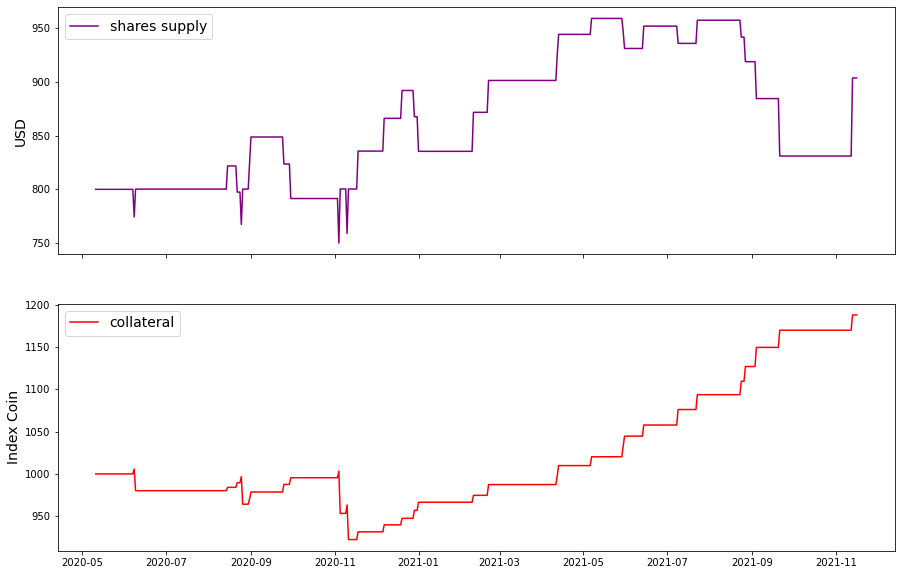

In [23]:
st = 0
N = 555

t = np.array(range(N))

fig, (shares_ax, col_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(15, 10))

shares_ax.plot(dates[st:N], xs_arr[st:N], label='shares supply',color='purple') 
shares_ax.set_ylabel('USD', fontsize=14)

legend = shares_ax.legend(loc='upper left', fontsize=14);

col_ax.plot(dates[st:N], collateral_arr[st:N], label='collateral',color='red') 
col_ax.set_ylabel('Index Coin', fontsize=14)
legend = col_ax.legend(loc='upper left', fontsize=14);

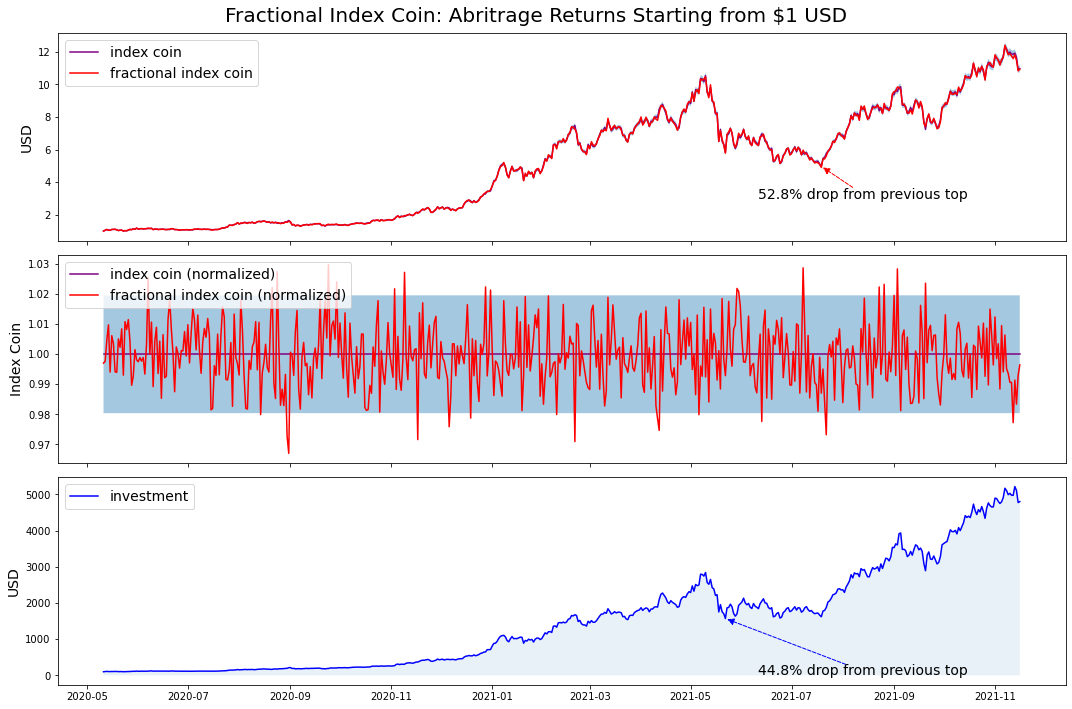

In [24]:
st = 0
N = 555

t = np.array(range(N))

fig, (usd_ax, ic_ax, inv_ax) = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(15, 10))

usd_ax.plot(dates[st:N], rindex[st:N], label='index coin',color='purple') 
usd_ax.plot(dates[st:N], findex_coin[st:N], label='fractional index coin',color='red')  
usd_ax.set_ylabel('USD', fontsize=14)
usd_ax.fill_between(dates[st:N], lwr_thres[st:N], upr_thres[st:N], alpha=0.4)

usd_ax.annotate('{:.1f}% drop from previous top'.format(drop_index), 
                    xy=(dates[ind_bot_index],bot_raw_index), 
                    xytext=(dates[ind_bot_invest+20],3),             
                    arrowprops=dict(arrowstyle= '-|>', color='red', lw=1, ls='--'), 
                    bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'),
                    fontsize=14)

legend = usd_ax.legend(loc='upper left', fontsize=14);

ic_ax.plot(dates[st:N], mu[st:N], label='index coin (normalized)',color='purple') 
ic_ax.plot(dates[st:N], findex[st:N], label='fractional index coin (normalized)',color='red') 
ic_ax.set_ylabel('Index Coin', fontsize=14)
ic_ax.fill_between(dates[t[st:N]], lwr_ithres[st:N], upr_ithres[st:N], alpha=0.4)
legend = ic_ax.legend(loc='upper left', fontsize=14);

inv_ax.plot(dates[st:N], invest[st:N], label='investment',color='blue')  
inv_ax.set_ylabel('USD', fontsize=14)
inv_ax.fill_between(dates[st:N], np.zeros(N)[st:N], invest[st:N], alpha=0.1)

inv_ax.annotate('{:.1f}% drop from previous top'.format(drop_invest), 
                    xy=(dates[ind_bot_invest],bot_invest), 
                    xytext=(dates[ind_bot_invest+20],8),             
                    arrowprops=dict(arrowstyle= '-|>', color='blue', lw=1, ls='--'), 
                    bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'),fontsize=14)

legend = inv_ax.legend(loc='upper left', fontsize=14);

fig.suptitle('Fractional Index Coin: Abritrage Returns Starting from $1 USD',fontsize=20)
fig.tight_layout()

fig.savefig('../img/fractional_index_coin.png')